# Classification

In [17]:
# Every line of code, where I didnt put a source or marked it as AI code, is from moodle and the professors Github repository


# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

In [18]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

df.head() 

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.00,1.62,64.00,yes,no,2.00,3.00,Sometimes,no,2.00,no,0.00,1.00,no,Public_Transportation,Normal_Weight
1,Female,21.00,1.52,56.00,yes,no,3.00,3.00,Sometimes,yes,3.00,yes,3.00,0.00,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.00,1.80,77.00,yes,no,2.00,3.00,Sometimes,no,2.00,no,2.00,1.00,Frequently,Public_Transportation,Normal_Weight
3,Male,27.00,1.80,87.00,no,no,3.00,3.00,Sometimes,no,2.00,no,2.00,0.00,Frequently,Walking,Overweight_Level_I
4,Male,22.00,1.78,89.80,no,no,2.00,1.00,Sometimes,no,2.00,no,0.00,0.00,Sometimes,Public_Transportation,Overweight_Level_II


In [19]:
df.shape

(2111, 17)

In [20]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [21]:

df['CAEC'].value_counts()

CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

In [22]:
df['CALC'].value_counts()

CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

In [23]:
df['MTRANS'].value_counts()

MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

In [24]:
from sklearn.preprocessing import OneHotEncoder


df['CAEC'] = df['CAEC'].replace({
    'no': 1,
    'Sometimes': 2,
    'Frequently': 3,
    'Always': 4
})

df['CALC'] = df['CALC'].replace({
    'no': 1,
    'Sometimes': 2,
    'Frequently': 3,
    'Always': 4
})

hot_encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")


variables_hot = ['MTRANS']
one_hot_encoded = hot_encoder.fit_transform(df[variables_hot]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables_hot)



C:\Users\dalli\AppData\Local\Temp\ipykernel_2268\4075777745.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CAEC'] = df['CAEC'].replace({
C:\Users\dalli\AppData\Local\Temp\ipykernel_2268\4075777745.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CALC'] = df['CALC'].replace({


In [25]:
from sklearn.preprocessing import LabelEncoder

le_variables = [ 'Gender','family_history_with_overweight', 'SMOKE', 'SCC', 'FAVC']

label_encoder = LabelEncoder()

df[le_variables] = df[le_variables].apply(label_encoder.fit_transform)



In [26]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [27]:
# I wanted to reduce the possible outputs, so I grouped some of them together

df['NObeyesdad'] = df['NObeyesdad'].replace({
    'Insufficient_Weight': '1: Insufficient_Weight',
    'Normal_Weight': '2: Normal_Weight',
    'Overweight_Level_I': '3: Overweight',
    'Overweight_Level_II': '3: Overweight',
    'Obesity_Type_I': '4: Obesity',
    'Obesity_Type_II': '4: Obesity',
    'Obesity_Type_III': '4: Obesity'
})

df['NObeyesdad'].value_counts()




NObeyesdad
4: Obesity                972
3: Overweight             580
2: Normal_Weight          287
1: Insufficient_Weight    272
Name: count, dtype: int64

In [28]:

# here I saw that the weight would indicate the output directly, so I dropped it

df = df.drop('Weight', axis=1)

df.head()

,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.00,1.62,1,0,2.00,3.00,2,0,2.00,0,0.00,1.00,1,2: Normal_Weight,0,0,0,1,0
1,0,21.00,1.52,1,0,3.00,3.00,2,1,3.00,1,3.00,0.00,2,2: Normal_Weight,0,0,0,1,0
2,1,23.00,1.80,1,0,2.00,3.00,2,0,2.00,0,2.00,1.00,3,2: Normal_Weight,0,0,0,1,0
3,1,27.00,1.80,0,0,3.00,3.00,2,0,2.00,0,2.00,0.00,3,3: Overweight,0,0,0,0,1
4,1,22.00,1.78,0,0,2.00,1.00,2,0,2.00,0,0.00,0.00,2,3: Overweight,0,0,0,1,0


In [29]:
X = df.drop('NObeyesdad', axis=1)
y_temp = df['NObeyesdad']

le = LabelEncoder()
y_enc = le.fit_transform(y_temp)

y = tf.keras.utils.to_categorical(y_enc)


categories = list(le.classes_)
categories

['1: Insufficient_Weight', '2: Normal_Weight', '3: Overweight', '4: Obesity']

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)


chi_2_features = SelectKBest(chi2, k=len(X_cat.columns))

best_features = chi_2_features.fit(X_cat,y.astype(int))

pd.options.display.float_format = '{:.2f}'.format

df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns,df_features],axis=1)
f_scores.columns = ['Features','Score']
f_scores.sort_values(by='Score',ascending=False)

,Features,Score
1,Age,392.05
11,FAF,178.21
12,TUE,143.43
3,family_history_with_overweight,104.97
18,MTRANS_Walking,98.46
10,SCC,76.02
7,CAEC,39.64
6,NCP,24.69
4,FAVC,21.65
14,MTRANS_Automobile,17.08


In [31]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.35)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

In [32]:
# logreg.fit(X_train, y_train) got a value error because it expected a 1d array. I used OnehotEncoder which created a 2d array.
# I used AI to generate the following function to convert the 2d array to 1d

import numpy as np

def to_1d(y):
    y = np.asarray(y)
    return y.argmax(axis=1) if (y.ndim == 2 and y.shape[1] > 1) else y.ravel()

y_train_1d = to_1d(y_train)
y_val_1d   = to_1d(y_val)
y_test_1d  = to_1d(y_test)

In [33]:
# https://www.datacamp.com/tutorial/understanding-logistic-regression-python

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=16)

logreg.fit(X_train, y_train_1d)

y_pred = logreg.predict(X_test)

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
# https://www.datacamp.com/tutorial/understanding-logistic-regression-python

from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test_1d, y_pred)
cnf_matrix

array([[ 26,  15,   1,   2],
       [ 13,  14,   8,  12],
       [  4,   9,  31,  68],
       [  1,   3,  11, 152]])

Text(0.5, 427.9555555555555, 'Predicted label')

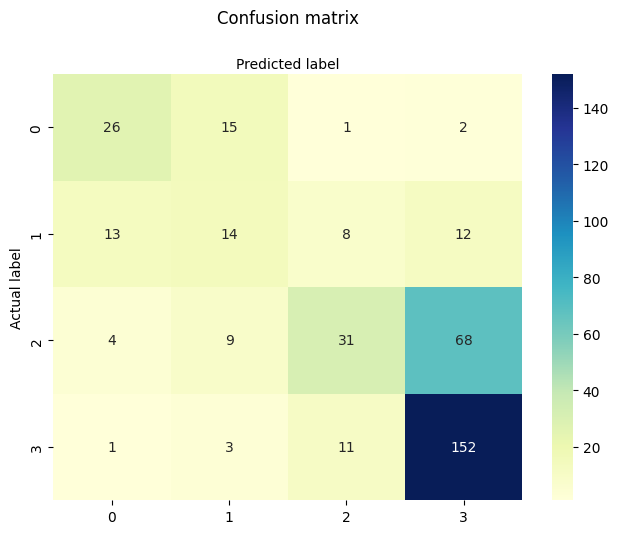

In [35]:
# https://www.datacamp.com/tutorial/understanding-logistic-regression-python

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [ ]:
# in comparison to ANN, the f1-score is a little bit worse.

from sklearn.metrics import classification_report
target_names = ['Insufficient Weight', 'Normal Weight', 'Overweight', 'Obesity']
print(classification_report(y_test_1d, y_pred, target_names=target_names))

                     precision    recall  f1-score   support

Insufficient Weight       0.59      0.59      0.59        44
      Normal Weight       0.34      0.30      0.32        47
         Overweight       0.61      0.28      0.38       112
            Obesity       0.65      0.91      0.76       167

           accuracy                           0.60       370
          macro avg       0.55      0.52      0.51       370
       weighted avg       0.59      0.60      0.57       370

